In [ ]:
# MANEJO DE ARCHIVOS GJON, DADOS POR ANDRES, MAPEO DE LOTES PARAISO
# EL SCRIPT EXTRAE LAS COORDENADAS Y LAS CONVIENTE EN SHAPEFILE


In [47]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

In [8]:
import os

In [72]:
CARPETA_ENTRADA = r"G:\BISMARK\_TEMP\21"      # carpeta con .json / .geojson / .txt
SALIDA_SHP = r"G:\BISMARK\_TEMP\21_salida\poligonos_utm20s_21.shp"

In [11]:
elementos = os.listdir(CARPETA_ENTRADA)
elementos

['Boundary{0d39f610-8649-4181-bbd7-a1bb8fd16b28}.gjson',
 'Boundary{195e3913-5a09-4ec8-b25a-0a0908fe7fa8}.gjson',
 'Boundary{1dc5b79a-fc3d-4f05-b9a4-4cc6335a5fcf}.gjson',
 'Boundary{35c19493-a560-474d-954f-0dc561b3e236}.gjson',
 'Boundary{4a352c78-e52b-404a-bf88-d9a148ea6377}.gjson',
 'Boundary{5132bb34-c214-402d-9840-ba7769b6cc44}.gjson',
 'Boundary{616b7eb3-bbdc-4386-8c3c-ccf36f31c5dd}.gjson',
 'Boundary{71f434a2-8212-4a82-bdf2-23a3d6a5bdd3}.gjson',
 'Boundary{7804ec5e-0e83-498c-b1af-87291705a5bb}.gjson',
 'Boundary{79e0a497-97a4-4504-9472-69f672b46c81}.gjson',
 'Boundary{7bde29ea-c28a-4537-ae94-f1e814f1b114}.gjson',
 'Boundary{7d50c09a-3a12-4d9a-9130-fd9d784f14b1}.gjson',
 'Boundary{8142da6d-c4ae-4c98-8cc0-99f0917a5d86}.gjson',
 'Boundary{8625f053-64e7-470a-9266-f1d8df76beb0}.gjson',
 'Boundary{9bd6dda1-a9c4-4ab1-ab95-f9e7e6110b05}.gjson',
 'Boundary{a383a9d5-01c3-43fc-8ea5-6129ff3a73f3}.gjson',
 'Boundary{a3a683e5-946f-447a-8e48-6689b6df6cae}.gjson',
 'Boundary{a8e02bd6-199d-4f82-b

In [69]:
for i in elementos:
    CARPETA_ENTRADA = os.path.join(r'G:\BISMARK\_TEMP\21' , i)
    print(CARPETA_ENTRADA)
    with open(CARPETA_ENTRADA, "r", encoding="utf-8") as f:
        contenido = f.read()
    print("Contenido del archivo:")
    data = json.loads(contenido)
    lista_coordenadas = data['features'][0]['geometry']['coordinates'][0]
    coords = [tuple(par) for par in lista_coordenadas]

    # Cerrar el anillo si hace falta
    if coords[0] != coords[-1]:
        coords = coords + [coords[0]]

    poly = Polygon(coords)
    
    gdf_poly = gpd.GeoDataFrame({"id":[1]}, geometry=[poly], crs="EPSG:4326")
    gdf_poly_utm_aux = gdf_poly.to_crs(epsg=32720)
    gdf_poly_utm = pd.concat([gdf_poly_utm_aux, gdf_poly_utm], ignore_index=True)

G:\BISMARK\_TEMP\21\Boundary{0d39f610-8649-4181-bbd7-a1bb8fd16b28}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{195e3913-5a09-4ec8-b25a-0a0908fe7fa8}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{1dc5b79a-fc3d-4f05-b9a4-4cc6335a5fcf}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{35c19493-a560-474d-954f-0dc561b3e236}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{4a352c78-e52b-404a-bf88-d9a148ea6377}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{5132bb34-c214-402d-9840-ba7769b6cc44}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{616b7eb3-bbdc-4386-8c3c-ccf36f31c5dd}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{71f434a2-8212-4a82-bdf2-23a3d6a5bdd3}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{7804ec5e-0e83-498c-b1af-87291705a5bb}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{79e0a497-97a4-4504-9472-69f672b46c81}.gjson
Contenido del archivo:
G:\BISMARK\_TEMP\21\Boundary{7bde29ea-c2

<Axes: >

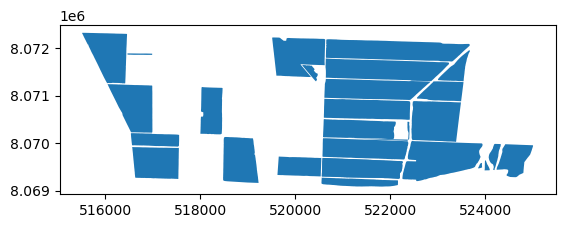

In [70]:
gdf_poly_utm.plot()

In [73]:
gdf_poly_utm.to_file(SALIDA_SHP, driver="ESRI Shapefile")

In [38]:
CARPETA_ENTRADA = r"G:\BISMARK\_TEMP\21\Boundary{c64168e6-20c1-45b3-bd79-3d4a0c96752e}.gjson"

In [39]:
if os.path.exists(CARPETA_ENTRADA):
    with open(CARPETA_ENTRADA, "r", encoding="utf-8") as f:
        contenido = f.read()
    print("Contenido del archivo:")
else:
    print("El archivo no existe")

Contenido del archivo:


In [40]:
data = json.loads(contenido)

In [42]:
lista_coordenadas = data['features'][0]['geometry']['coordinates'][0]

In [45]:
df = pd.DataFrame(lista_coordenadas, columns=["longitud", "latitud"])

In [46]:
df

,longitud,latitud
0,-62.806288,-17.459309
1,-62.806288,-17.459309
2,-62.806288,-17.459309
3,-62.806288,-17.459308
4,-62.806288,-17.459308
...,...,...
5951,-62.806301,-17.459547
5952,-62.806301,-17.459547
5953,-62.806301,-17.459546
5954,-62.806301,-17.459546


In [48]:
coords = [tuple(par) for par in lista_coordenadas]

# Cerrar el anillo si hace falta
if coords[0] != coords[-1]:
    coords = coords + [coords[0]]

poly = Polygon(coords)

gdf_poly = gpd.GeoDataFrame({"id":[1]}, geometry=[poly], crs="EPSG:4326")
print(gdf_poly)

   id                                           geometry
0   1  POLYGON ((-62.80629 -17.45931, -62.80629 -17.4...


<Axes: >

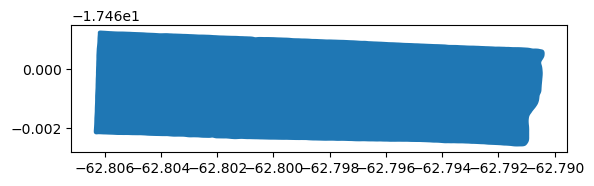

In [58]:
gdf_poly.plot()

In [59]:
gdf_poly_utm = gdf_poly.to_crs(epsg=32720)

In [60]:
gdf_poly_utm

,id,geometry
0,1,"POLYGON ((520568.507 8069622.290, 520568.510 8..."


In [61]:
gdf_poly_utm.to_file(SALIDA_SHP, driver="ESRI Shapefile")